# Decision Tree
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [63]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [64]:
# importing the necessary libraries
data = pd.read_csv('Fraud_check.csv')

In [65]:
#EDA
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [31]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [32]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [66]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [69]:
data.shape

(600, 6)

##### Visualizations

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


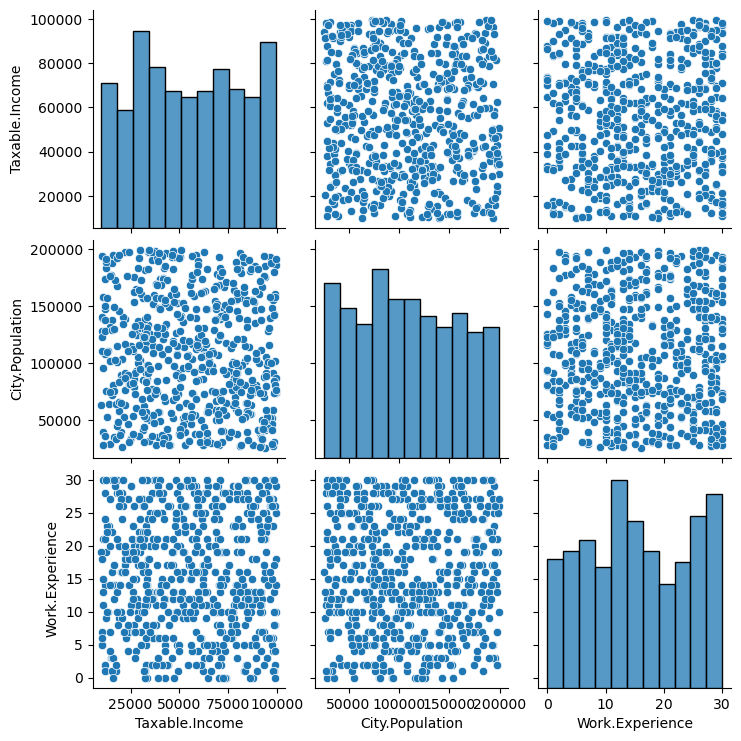

In [71]:
import seaborn as sns
sns.pairplot(data)

In [33]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data1=data.copy()
data1['taxable_category'] = pd.cut(x = data1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [34]:
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [35]:
numerical_features = data.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

In [41]:
data['income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [42]:
data1 = data.drop(['Taxable.Income'], axis=1)


In [43]:
le = preprocessing.LabelEncoder()
categorical_features = data1.select_dtypes(include=["object"]).columns
for col in categorical_features:
    data1[col] = le.fit_transform(data1[col])

##### Building Decision Tree Classifier (CART) using Gini Criteria


In [44]:
X = data1.drop(['income'], axis=1)
y = data1['income']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
preds = model.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))

Accuracy: 0.7583333333333333

Confusion Matrix:
 [[91  3]
 [26  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        94
           1       0.00      0.00      0.00        26

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.76      0.68       120



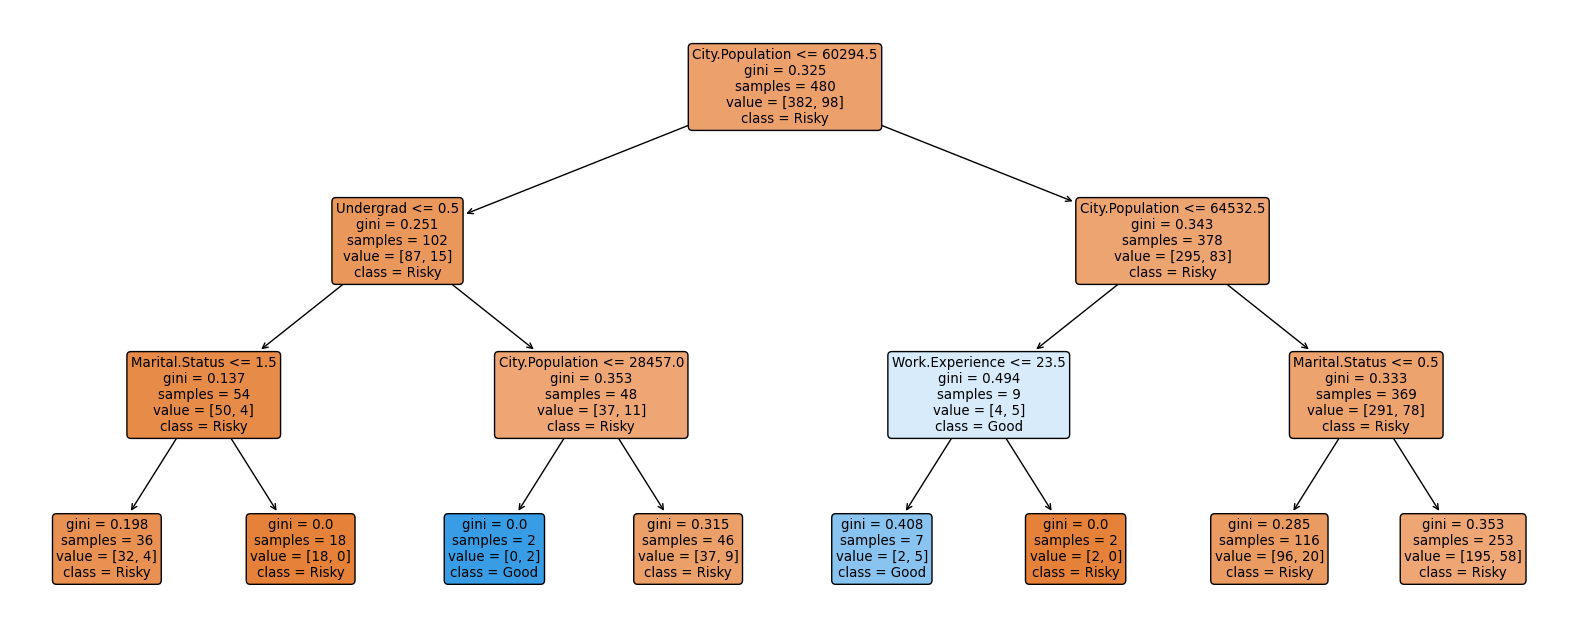

In [83]:
# Visualize the decision tree
plt.figure(figsize=(20, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Risky', 'Good'], rounded=True)
plt.show()

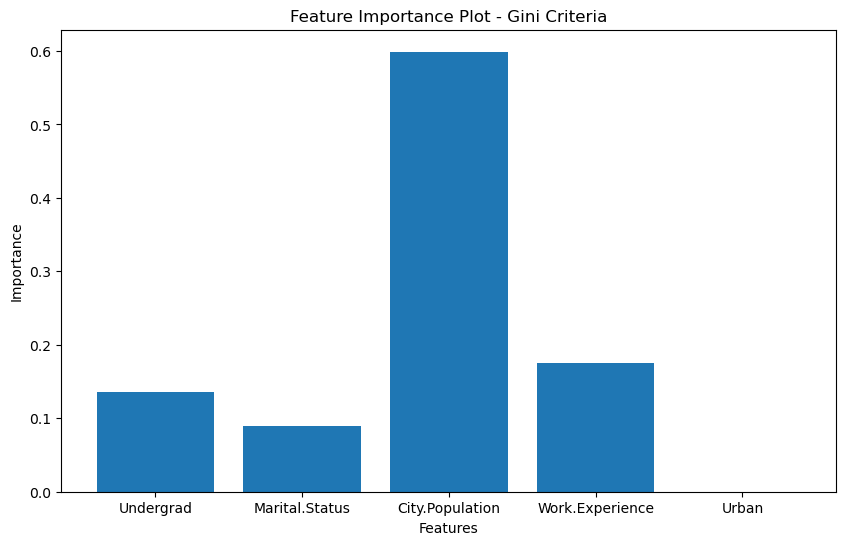

In [88]:
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot - Gini Criteria')
plt.show()

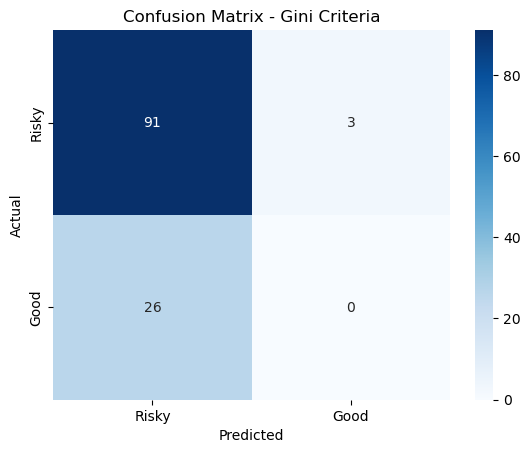

In [93]:
# Confusion Matrix Heatmap for Gini Criteria
conf_matrix_gini = confusion_matrix(y_test, preds)
sns.heatmap(conf_matrix_gini, annot=True, fmt='d', cmap='Blues', xticklabels=['Risky', 'Good'], yticklabels=['Risky', 'Good'])
plt.title('Confusion Matrix - Gini Criteria')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###### Building Decision Tree Classifier using Entropy Criteria

In [73]:
X = data1.drop(['income'], axis=1)
y = data1['income']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

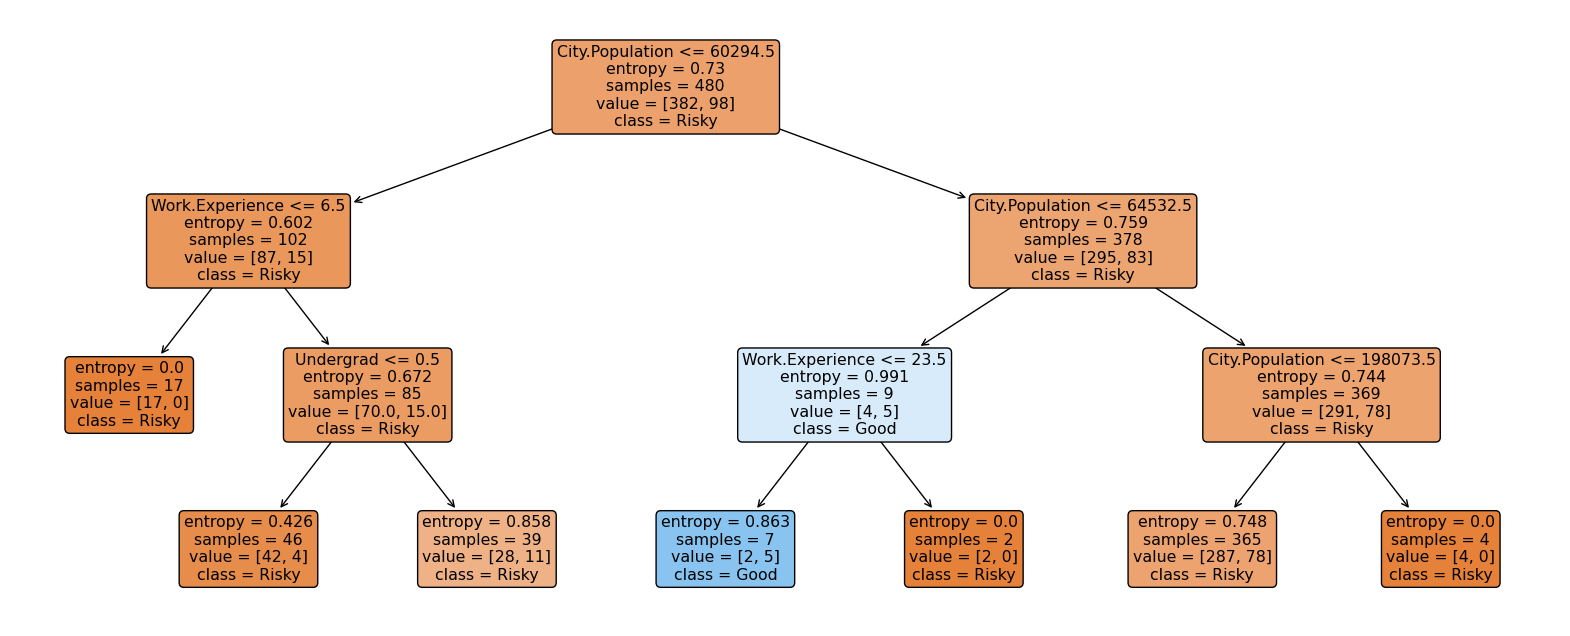

In [90]:
# from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 8))
plot_tree(model2, filled=True, feature_names=X.columns, class_names=['Risky', 'Good'], rounded=True)
plt.show()


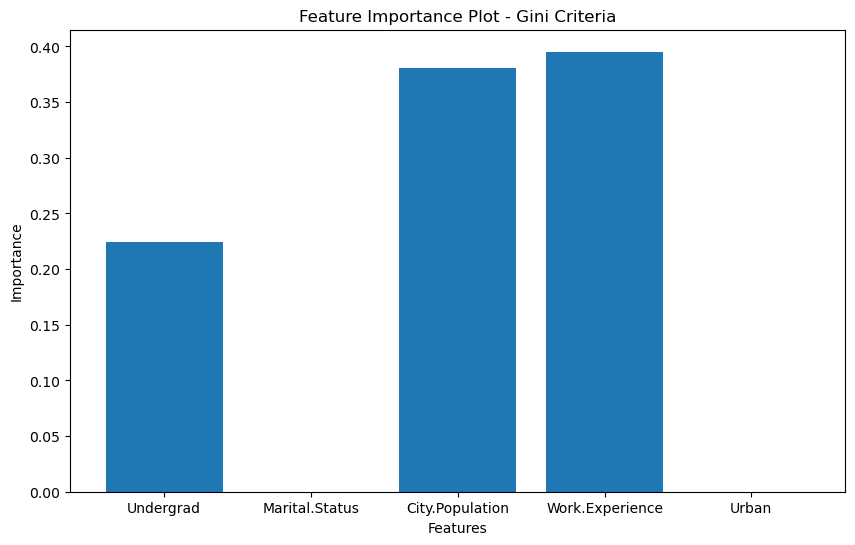

In [89]:
feature_importance = model2.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot - Gini Criteria')
plt.show()

In [80]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
pd.crosstab(y_test,preds)

col_0,0,1
income,,
0,91,3
1,26,0


In [82]:
np.mean(preds==y_test)

0.7583333333333333